# Google Play Apps Store Analysis 

The objective of this project is to highlight the specific characteristics of the most popular apps by rating at Google Play Store. 

I aim to answer the following questions:

- What categories have better ratings?
- Are there differences in ratings between paid and free apps?
- Do other features such as number of reviews and content rating have any influece on rating?

The complete analysis is conducted in this Jupyter notebook. Annotations are done after each section and conclusions are summarized at the end of the notebook.

## Loading the data

In [929]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [930]:
df=pd.read_csv('data/googleplaystore.csv', sep=';')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,$5.99,Everyone,Weather,"November 21, 2017",Varies with device,Varies with device
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,0,Everyone,Weather,"June 7, 2018",Varies with device,Varies with device
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"June 26, 2018",Varies with device,Varies with device
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 31, 2018",Varies with device,Varies with device


In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9368 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10335 non-null  object 
 11  Current Ver     10317 non-null  object 
 12  Android Ver     10284 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [932]:
df.shape

(10841, 13)

The dataset has 10841 rows and 13 columns.

### Data dictionary

The dataset contains information for 10,000+ apps on the Google-Play store. The thirteen features in the dataset are:

- `App`: application name
- `Category`: primary use of app
- `Rating`: 1 to 5 star
- `Reviews`: number of user reviews
- `Size`: in Mbs
- `Installs`: number of downloads
- `Type`: paid or free
- `Price`: $ for paid apps
- `Content` rating: targeted age group
- `Genres`: a subdivision of `Category`
- `Last updated`: date of last updated entry in the database
- `Current version`: latest version on Play Store
- `Android version`: latest android version

## Data wrangling 

The following issues need to addressed during this phase and before conducting any analysis: 
1. Check for duplicates. 
2. Check reasons for null values in `rating`, `last updated`, `current version` and `android version`.  
3. Analyze if `Category`and `Genre` provide the same information.
4. Price should be a float not an object

### Checking for duplicates

In [933]:
df.duplicated().sum()

482

In [934]:
482/len(df)

0.04446084309565538

4.4% of the observations are duplicates. This is not a signigicant enough number to affect the analysis. The remaining dataset is large enough. I proceed to drop them. 

In [935]:
df = df.drop_duplicates()

In [936]:
df.shape

(10359, 13)

In [937]:
## Reset the index to facilitate use of for loops later 
df = df.reset_index(drop=True)

### Check null values

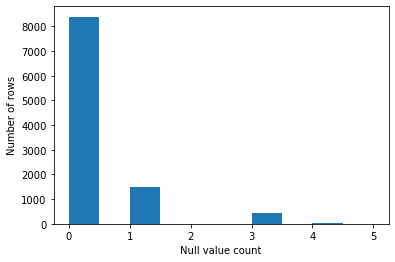

In [938]:
# Check the null count in each row 
# Create a histogram for easier visualization
plt.figure()
plt.hist(df.isna().sum(axis=1))
plt.xlabel('Null value count')
plt.ylabel('Number of rows')
plt.show()

Very few rows have more than two missing values. Most ~8000, have only one missing value. At this moment, no dropping of rows is necessary. I will check again once I perform additional analysis of each individual variabale. 

In [939]:
# Check for null count in each column
df.isna().sum(axis=0)

App                  0
Category             0
Rating            1464
Reviews              1
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               1
Last Updated       470
Current Ver        487
Android Ver        515
dtype: int64

Rating is the most important variable in this analysis. Nearly 14% of the observations have null values. Let's look closer at the rating variable. 

#### Focusing on Rating

In [940]:
## Creating a dataframe with only these NaN observations
dfNaN=df[df['Rating'].isna()]

In [941]:
dfNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 10 to 10355
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1464 non-null   object 
 1   Category        1464 non-null   object 
 2   Rating          0 non-null      float64
 3   Reviews         1464 non-null   float64
 4   Size            1464 non-null   object 
 5   Installs        1464 non-null   object 
 6   Type            1464 non-null   object 
 7   Price           1464 non-null   object 
 8   Content Rating  1464 non-null   object 
 9   Genres          1464 non-null   object 
 10  Last Updated    1449 non-null   object 
 11  Current Ver     1444 non-null   object 
 12  Android Ver     1448 non-null   object 
dtypes: float64(2), object(11)
memory usage: 160.1+ KB


In [942]:
dist_nan=dfNaN['Category'].value_counts()

In [943]:
dist_nan

FAMILY                 225
BUSINESS               157
TOOLS                  109
MEDICAL                106
PERSONALIZATION         78
PRODUCTIVITY            73
LIFESTYLE               68
SPORTS                  65
COMMUNICATION           59
BOOKS_AND_REFERENCE     53
NEWS_AND_MAGAZINES      50
GAME                    47
HEALTH_AND_FITNESS      44
FINANCE                 43
SOCIAL                  36
DATING                  36
TRAVEL_AND_LOCAL        32
SHOPPING                22
LIBRARIES_AND_DEMO      20
EVENTS                  19
FOOD_AND_DRINK          18
PHOTOGRAPHY             18
VIDEO_PLAYERS           15
MAPS_AND_NAVIGATION     13
HOUSE_AND_HOME          12
AUTO_AND_VEHICLES       12
BEAUTY                  11
PARENTING               10
WEATHER                  7
ART_AND_DESIGN           3
COMICS                   2
EDUCATION                1
Name: Category, dtype: int64

Let's take a quick look at the distributions of the NaN dataset and the original dataset with a pie chart. 

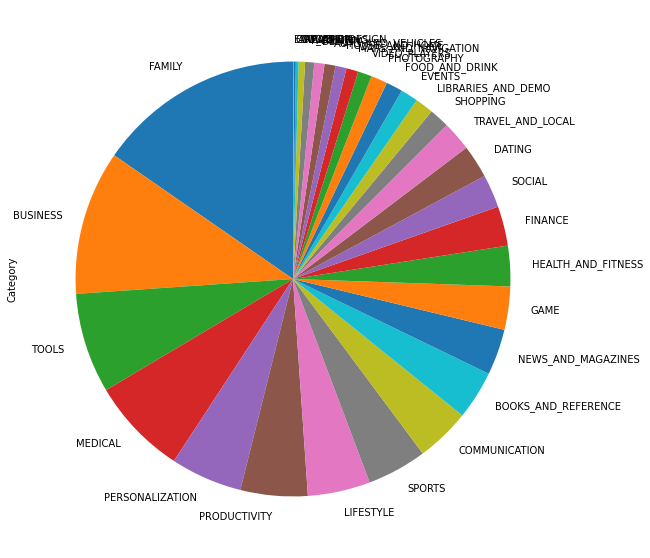

In [944]:
NaNpie=dist_nan.plot.pie(startangle=90, figsize=(15,10))

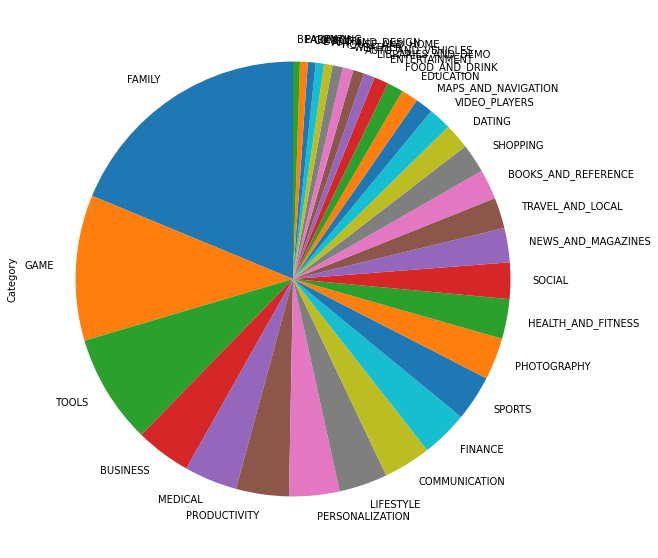

In [945]:
dfpie=df['Category'].value_counts().plot.pie(startangle=90, figsize=(15,10))

The top ~50% of both pies have the same categories
- Family
- Game
- Tools
- Business
- Medical 
- Productivity
- Personalization 
- Lifestyle

To dive deeper, I propose  two approaches: 

- First approach: drop all observations with null variables 
- Second approach: replace them with the median or mean rating for a particular category. 

Let's compare the resulting datasets to see which one seems more appropriate for the purpose of the analysis.  

In [946]:
## First approach: dropping all rows with NaN ratings
df1=df.drop(df[df['Rating'].isna()].index)

In [947]:
## Reset the index to facilitate use of for loops later 
df1 = df1.reset_index(drop=True)

In [948]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8895 entries, 0 to 8894
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8895 non-null   object 
 1   Category        8895 non-null   object 
 2   Rating          8895 non-null   float64
 3   Reviews         8894 non-null   float64
 4   Size            8895 non-null   object 
 5   Installs        8895 non-null   object 
 6   Type            8895 non-null   object 
 7   Price           8895 non-null   object 
 8   Content Rating  8894 non-null   object 
 9   Genres          8894 non-null   object 
 10  Last Updated    8440 non-null   object 
 11  Current Ver     8428 non-null   object 
 12  Android Ver     8396 non-null   object 
dtypes: float64(2), object(11)
memory usage: 903.5+ KB


The dataframe is now down to 8895 observations. 

In [949]:
## Calculating the mean for each category for future comparison with the second approach
avg_without=df1.groupby('Category').mean()['Rating']

In [950]:
avg_without

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.972671
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333871
PHOTOGRAPHY            4.175410
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

In [951]:
## Second approach: inputing the mean or median of each category to NaN
# We'll fill with some measure of central tendency
print('Median:', df['Rating'].median())
print('Mode:', df['Rating'].mode())

Median: 4.3
Mode: 0    4.4
dtype: float64


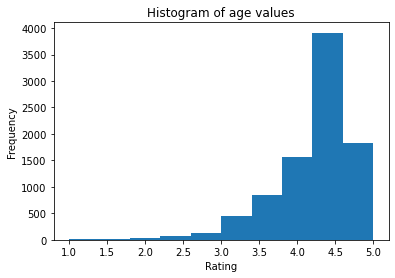

In [952]:
# Lets look at a histogram to check for skew
plt.figure()
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of age values')
plt.show()

The distribution has a left skew. The median and mode are more representative of the distribution. Apps with really bad ratings lower the average and create the skew. To keep this same criteria at the category level, I'll impute the median value of each category to the missing ratings.  

In [953]:
median_without = df1.groupby('Category').median()['Rating']

In [954]:
median_without

Category
ART_AND_DESIGN         4.40
AUTO_AND_VEHICLES      4.30
BEAUTY                 4.30
BOOKS_AND_REFERENCE    4.50
BUSINESS               4.25
COMICS                 4.40
COMMUNICATION          4.30
DATING                 4.10
EDUCATION              4.40
ENTERTAINMENT          4.20
EVENTS                 4.50
FAMILY                 4.30
FINANCE                4.30
FOOD_AND_DRINK         4.30
GAME                   4.30
HEALTH_AND_FITNESS     4.50
HOUSE_AND_HOME         4.20
LIBRARIES_AND_DEMO     4.20
LIFESTYLE              4.20
MAPS_AND_NAVIGATION    4.20
MEDICAL                4.30
NEWS_AND_MAGAZINES     4.20
PARENTING              4.40
PERSONALIZATION        4.40
PHOTOGRAPHY            4.30
PRODUCTIVITY           4.30
SHOPPING               4.30
SOCIAL                 4.30
SPORTS                 4.30
TOOLS                  4.20
TRAVEL_AND_LOCAL       4.20
VIDEO_PLAYERS          4.20
WEATHER                4.30
Name: Rating, dtype: float64

In [955]:
## Creating a dictionary with these values to iterate afterwards
median_without.index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [956]:
categories=list(median_without.index)

In [957]:
categories

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

In [958]:
## Creating an empty dictionary
dict1={}

In [959]:
## Creating a for loop to fill the dictionary
for i in range(len(categories)):
    name=categories[i]
    dict1[name]=median_without[i]

In [960]:
## Checking that the dictionary is complete
dict1

{'ART_AND_DESIGN': 4.4,
 'AUTO_AND_VEHICLES': 4.3,
 'BEAUTY': 4.3,
 'BOOKS_AND_REFERENCE': 4.5,
 'BUSINESS': 4.25,
 'COMICS': 4.4,
 'COMMUNICATION': 4.3,
 'DATING': 4.1,
 'EDUCATION': 4.4,
 'ENTERTAINMENT': 4.2,
 'EVENTS': 4.5,
 'FAMILY': 4.3,
 'FINANCE': 4.3,
 'FOOD_AND_DRINK': 4.3,
 'GAME': 4.3,
 'HEALTH_AND_FITNESS': 4.5,
 'HOUSE_AND_HOME': 4.2,
 'LIBRARIES_AND_DEMO': 4.2,
 'LIFESTYLE': 4.2,
 'MAPS_AND_NAVIGATION': 4.2,
 'MEDICAL': 4.3,
 'NEWS_AND_MAGAZINES': 4.2,
 'PARENTING': 4.4,
 'PERSONALIZATION': 4.4,
 'PHOTOGRAPHY': 4.3,
 'PRODUCTIVITY': 4.3,
 'SHOPPING': 4.3,
 'SOCIAL': 4.3,
 'SPORTS': 4.3,
 'TOOLS': 4.2,
 'TRAVEL_AND_LOCAL': 4.2,
 'VIDEO_PLAYERS': 4.2,
 'WEATHER': 4.3}

In [961]:
## Creating a new dataframe to fill in the median values and not override the orignal df
df2=df.copy()

In [962]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10359 entries, 0 to 10358
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10359 non-null  object 
 1   Category        10359 non-null  object 
 2   Rating          8895 non-null   float64
 3   Reviews         10358 non-null  float64
 4   Size            10359 non-null  object 
 5   Installs        10359 non-null  object 
 6   Type            10359 non-null  object 
 7   Price           10359 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    9889 non-null   object 
 11  Current Ver     9872 non-null   object 
 12  Android Ver     9844 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [963]:
## Filling out NaN with a dummy number
df2['Rating'] = df2['Rating'].fillna(100)

In [964]:
df2['Rating']

0          4.5
1          4.5
2          3.5
3          4.6
4          4.3
         ...  
10354      4.5
10355    100.0
10356      4.3
10357      4.4
10358      4.1
Name: Rating, Length: 10359, dtype: float64

In [965]:
## replacing that dummy number in df2
for i in range(10359):
    if df2['Rating'][i]==100:
        var_=df2['Category'][i]
        df2['Rating'][i]=dict1[var_]

In [966]:
## The rating category is now complete
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10359 entries, 0 to 10358
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10359 non-null  object 
 1   Category        10359 non-null  object 
 2   Rating          10359 non-null  float64
 3   Reviews         10358 non-null  float64
 4   Size            10359 non-null  object 
 5   Installs        10359 non-null  object 
 6   Type            10359 non-null  object 
 7   Price           10359 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    9889 non-null   object 
 11  Current Ver     9872 non-null   object 
 12  Android Ver     9844 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [967]:
## Replacement is complete. No 100s
df2['Rating']

0        4.5
1        4.5
2        3.5
3        4.6
4        4.3
        ... 
10354    4.5
10355    4.4
10356    4.3
10357    4.4
10358    4.1
Name: Rating, Length: 10359, dtype: float64

I want to check if the average ratings per category in df1 (dropping observations) and df2 (inputing median for missing values) are different.

In [968]:
avg_without_replacement = df1.groupby('Category').mean()['Rating']

In [969]:
avg_with_replacement = df2.groupby('Category').mean()['Rating']

In [970]:
diff=avg_without_replacement-avg_with_replacement

In [971]:
diff.mean()

-0.01487282443426776

The average difference is not trivial. The new dataset, on average, has a more positive spin than the dropped data set. Hence, I prefer to use df1, noting than the dropped observations could be a source of bias. However, using this inputed method, will certainly introduce a skew.  

#### Focusing on other null values

In [972]:
## For the rest of the notebook, I'll be working with df1, the dataset that dropped the ~1400 missing ratings
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8895 entries, 0 to 8894
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8895 non-null   object 
 1   Category        8895 non-null   object 
 2   Rating          8895 non-null   float64
 3   Reviews         8894 non-null   float64
 4   Size            8895 non-null   object 
 5   Installs        8895 non-null   object 
 6   Type            8895 non-null   object 
 7   Price           8895 non-null   object 
 8   Content Rating  8894 non-null   object 
 9   Genres          8894 non-null   object 
 10  Last Updated    8440 non-null   object 
 11  Current Ver     8428 non-null   object 
 12  Android Ver     8396 non-null   object 
dtypes: float64(2), object(11)
memory usage: 903.5+ KB


In [973]:
# Last Updated#
df1['Last Updated'].value_counts()

August 3, 2018        272
July 31, 2018         239
August 1, 2018        239
August 2, 2018        238
July 30, 2018         178
                     ... 
August 13, 2017         1
August 18, 2017         1
April 14, 2015          1
September 19, 2013      1
February 16, 2016       1
Name: Last Updated, Length: 1280, dtype: int64

In [974]:
df1['Last Updated'].nunique()

1280

Aside from the 1280 unique values, i.e. unique dates, this feature also has 454 missing values. For now, I do not have a specific question with regards to this variable. Dropping 454 observations might lose value information about `Rating`, `Category` and `Type`. Imputing values would be highly subjective, as the date is probably a random variable that could be any of the dates in the range.  

In [975]:
## Current Ver 
df1['Current Ver'].value_counts()

Varies with device    1215
1                      460
1.1                    194
1.2                    128
2                      125
                      ... 
6.4.8                    1
2.10.7                   1
1.2.21                   1
5.9.7                    1
10.2.0                   1
Name: Current Ver, Length: 2493, dtype: int64

Like the previous variable, dropping +400 observations might lose valuable information. Imputing values would be highly subjective, as the current version is probably a random variable that could be any of the versions in the column or a version that is not in the column. Hence, changes will be performed here. 

In [976]:
## Android Ver 
df1['Android Ver'].value_counts()

4.1 and up            1835
Varies with device    1134
4.0.3 and up          1116
4.0 and up            1036
4.4 and up             743
2.3 and up             533
5.0 and up             465
4.2 and up             310
2.3.3 and up           227
3.0 and up             206
2.2 and up             197
4.3 and up             188
2.1 and up             112
1.6 and up              87
6.0 and up              45
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              11
3.1 and up               8
2.0.1 and up             6
4.4W and up              5
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

Same comment as the previous feature applies. No changes will be performed here.

In [977]:
## Content Rating
df1['Content Rating'].value_counts()

Everyone           7095
Teen               1023
Mature 17+          412
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [978]:
df1[(df1['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1045,DC Universe Online Map,TOOLS,4.1,1186.0,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [979]:
## Are there missing values 
df1[df1['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4131,591 housing transactions - renting houses,HOUSE_AND_HOME,4.1,24977.0,21M,"1,000,000+",Free,0,NaN,NaN,NaN,NaN,NaN


In [980]:
df1['Content Rating'] = df1['Content Rating'].fillna('Everyone')

In [981]:
df1[df1['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No more missing values

### Compare Category to Genre

In [982]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,$5.99,Everyone,Weather,"November 21, 2017",Varies with device,Varies with device
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,0,Everyone,Weather,"June 7, 2018",Varies with device,Varies with device
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"June 26, 2018",Varies with device,Varies with device
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,0,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 31, 2018",Varies with device,Varies with device


In [983]:
## Transform Genres to Upper Case to conduct a True-False test against Category
df1['Genres']=df1['Genres'].str.upper()

In [984]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,$5.99,Everyone,WEATHER,"November 21, 2017",Varies with device,Varies with device
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,0,Everyone,WEATHER,"June 7, 2018",Varies with device,Varies with device
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,0,Everyone,WEATHER,"June 26, 2018",Varies with device,Varies with device
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,0,Everyone,WEATHER,"June 12, 2018",Varies with device,Varies with device
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,0,Everyone,WEATHER,"July 31, 2018",Varies with device,Varies with device


In [985]:
## Checking if they are not the same
counter=0
for i in range(8895):
    if df1['Category'][i] != df1['Genres'][i]:
        counter = counter+1

In [986]:
counter

4308

Nearly half of the observations are not the same. Hence, `Genres` remains in the dataset.

### Transform Price to float

The main issue here is the $ sign before prices that are different to zero. i.e. where `Type` is 'paid'

In [987]:
## creating a new column for the number after the dollar sign
df1['test'] = df1['Price'].str.split('$', expand=True).loc[:,1]

In [988]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,test
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,$5.99,Everyone,WEATHER,"November 21, 2017",Varies with device,Varies with device,5.99
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,0,Everyone,WEATHER,"June 7, 2018",Varies with device,Varies with device,None
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,0,Everyone,WEATHER,"June 26, 2018",Varies with device,Varies with device,None
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,0,Everyone,WEATHER,"June 12, 2018",Varies with device,Varies with device,None
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,0,Everyone,WEATHER,"July 31, 2018",Varies with device,Varies with device,None


In [989]:
## Filling None values with "0"
df1['test'] = df1['test'].fillna(0)

In [990]:
## Dropping the original price column
df1.drop(columns=['Price'], inplace=True)

In [991]:
## Renaming the test column
df1.rename(columns = {'test':'Price'}, inplace = True)

In [992]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8895 entries, 0 to 8894
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8895 non-null   object 
 1   Category        8895 non-null   object 
 2   Rating          8895 non-null   float64
 3   Reviews         8894 non-null   float64
 4   Size            8895 non-null   object 
 5   Installs        8895 non-null   object 
 6   Type            8895 non-null   object 
 7   Content Rating  8895 non-null   object 
 8   Genres          8894 non-null   object 
 9   Last Updated    8440 non-null   object 
 10  Current Ver     8428 non-null   object 
 11  Android Ver     8396 non-null   object 
 12  Price           8895 non-null   object 
dtypes: float64(2), object(11)
memory usage: 903.5+ KB


In [993]:
## The columns are correct but Price is an object. I transform it to a float. 
df1['Price'] = df1['Price'].astype(float)

In [994]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8895 entries, 0 to 8894
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8895 non-null   object 
 1   Category        8895 non-null   object 
 2   Rating          8895 non-null   float64
 3   Reviews         8894 non-null   float64
 4   Size            8895 non-null   object 
 5   Installs        8895 non-null   object 
 6   Type            8895 non-null   object 
 7   Content Rating  8895 non-null   object 
 8   Genres          8894 non-null   object 
 9   Last Updated    8440 non-null   object 
 10  Current Ver     8428 non-null   object 
 11  Android Ver     8396 non-null   object 
 12  Price           8895 non-null   float64
dtypes: float64(3), object(10)
memory usage: 903.5+ KB


In [995]:
##Check for NaN under a single DataFrame column: 
df1[df1['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price


Since this column won't be part of the analysis, it's not necessary to impute data, althouugh Genre could be imputed in Genre. There is no need to drop a row, since it has category, rating, type and price complete, which is what we need. 

## Data Exploration 

### Descriptive statistics and feature engineering

The summary statistics for the numerical variables in df1.

In [996]:
df1.describe()

,Rating,Reviews,Price
count,8895.000000,8.894000e+03,8895.000000
mean,4.187589,4.726703e+05,0.963278
std,0.522856,2.904734e+06,16.186649
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,0.000000
50%,4.300000,4.708000e+03,0.000000
75%,4.500000,7.119725e+04,0.000000
max,5.000000,7.815831e+07,400.000000


The mean `Rating` is 4.19 and the median `Rating` is 4.30. 
The mean price is `0.96`, although this includes both paid and free apps. Hence, up until the 75th percentile the price is 0. 

In [997]:
df1['Type'].value_counts()

Free    8281
Paid     614
Name: Type, dtype: int64

93.1% of apps in the store are free. 

In [998]:
df1['Price'].value_counts()

0.00     8281
2.99      110
0.99      105
4.99       68
1.99       59
         ... 
4.84        1
2.90        1
1.61        1
4.60        1
14.00       1
Name: Price, Length: 73, dtype: int64

#### Grouping `Installs` into fewer categories

In [999]:
df1['Installs'].value_counts()

1,000,000+        1486
10,000,000+       1132
100,000+          1111
10,000+            989
1,000+             699
5,000,000+         683
500,000+           516
50,000+            462
5,000+             426
100,000,000+       369
100+               304
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: Installs, dtype: int64

This category is not as usefull in 14 subgroups. To use it in the analysis, perhaphs it can be summed up in four groups. 
- Small:less than 100k
- Medium: between 100k and 1 million
- Large: between 1 million and 50 million
- Unicorn: more than 50 million

In [1000]:
df1['Popularity']='temp'

In [1001]:
df1['Popularity'].value_counts()

temp    8895
Name: Popularity, dtype: int64

In [1002]:
## Filling the small observations first tranche
df1.loc[(df1['Installs']=='1+') | (df1['Installs']=='5+') | (df1['Installs']=='10+')| (df1['Installs']=='50+')| (df1['Installs']=='100+'), 'Popularity'] = 'Small'

In [1003]:
## Filling the small observations second tranche
df1.loc[(df1['Installs']=='500+') | (df1['Installs']=='1,000+') | (df1['Installs']=='5,000+')| (df1['Installs']=='10,000+')| (df1['Installs']=='50,000+'), 'Popularity'] = 'Small'

In [1004]:
## Filling the medium observations
df1.loc[(df1['Installs']=='100,000+') | (df1['Installs']=='500,000+'), 'Popularity'] = 'Medium'

In [1005]:
## Filling the large observations
df1.loc[(df1['Installs']=='1,000,000+') | (df1['Installs']=='5,000,000+') | (df1['Installs']=='10,000,000+') , 'Popularity'] = 'Large'

In [1006]:
## Filling the unicorn observations
df1.loc[(df1['Installs']=='50,000,000+') | (df1['Installs']=='100,000,000+') | (df1['Installs']=='500,000,000+')  | (df1['Installs']=='1,000,000,000+') , 'Popularity'] = 'Unicorn'

In [1007]:
df1['Popularity'].value_counts()

Large      3301
Small      3216
Medium     1627
Unicorn     751
Name: Popularity, dtype: int64

#### Grouping `Reviews` into categories

Acording to the distribution statistics for reviews, the 25th percentile is 162, the median value for reviews is 4700 and the maximum value is 7.8 million. This is quite a variance. The main concern with this variable is the stability of the reviews. The more reviews, the more robust the rating. Hence, I propose the following three categories: 
- Unstable: less than the 25th percentile of the median value
- Medium: between the 25th percentile and the median value
- Stable: more than the median value

In [1008]:
df1['Cat_Reviews']='temp'

In [1009]:
## Filling the unstable 
df1.loc[(df1['Reviews']<162) , 'Cat_Reviews'] = 'Unstable'

In [1010]:
## Filling the unstable 
df1.loc[(df1['Reviews']>4700) , 'Cat_Reviews'] = 'Stable'

In [1011]:
## Filling the medium observations
df1.loc[(df1['Cat_Reviews']=='temp'), 'Cat_Reviews'] = 'Medium'

In [1012]:
df1['Cat_Reviews'].value_counts()

Stable      4449
Medium      2235
Unstable    2211
Name: Cat_Reviews, dtype: int64

In [1013]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price,Popularity,Cat_Reviews
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,Everyone,WEATHER,"November 21, 2017",Varies with device,Varies with device,5.99,Medium,Stable
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,Everyone,WEATHER,"June 7, 2018",Varies with device,Varies with device,0.00,Large,Stable
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 26, 2018",Varies with device,Varies with device,0.00,Large,Stable
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 12, 2018",Varies with device,Varies with device,0.00,Large,Stable
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,Everyone,WEATHER,"July 31, 2018",Varies with device,Varies with device,0.00,Medium,Medium


#### Grouping `Content Rating` into fewer categories

In [1014]:
## Analyzing the Content variable
df1['Content Rating'].value_counts()

Everyone           7096
Teen               1023
Mature 17+          412
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [1015]:
df1['Cat_Content']='temp'

In [1016]:
## Filling the small observations first tranche
df1.loc[(df1['Content Rating']=='Everyone')| (df1['Content Rating']=='Unrated'), 'Cat_Content'] = 'Everyone'

In [1017]:
## Filling the small observations first tranche
df1.loc[(df1['Content Rating']=='Teen')| (df1['Content Rating']=='Everyone 10+'), 'Cat_Content'] = 'Teen'

In [1018]:
## Filling the small observations first tranche
df1.loc[(df1['Content Rating']=='Mature 17+')| (df1['Content Rating']=='Adults only 18+'), 'Cat_Content'] = 'Adult'

In [1019]:
df1['Cat_Content'].value_counts()

Everyone    7097
Teen        1383
Adult        415
Name: Cat_Content, dtype: int64

### Creating new dataframes

I want to explore the relationships between `Rating`, `Category`, `Reviews`, `Type` and `Price`. In section 2, some of the plots for rating and category gave us an introduction to the dataset. Now, I will create a new dataframe that will facilitate plotting  grouped by category. 

#### Number of observations in the dataset per category. 

In [1020]:
num_ob=df1['Category'].value_counts()

In [1021]:
num_ob

FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             305
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
DATING                  161
VIDEO_PLAYERS           160
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [1022]:
## I want to put these into a dataframe
df3=pd.DataFrame(data=num_ob).reset_index()

In [1023]:
df3.head()

,index,Category
0,FAMILY,1718
1,GAME,1074
2,TOOLS,734
3,PRODUCTIVITY,334
4,FINANCE,317


In [1024]:
## I want to change the names in the columns 
## I'll do it separately to avoid overriding changes in Category
df3.rename(columns = {'Category':'Count'}, inplace = True)
df3.rename(columns = {'index':'Category'}, inplace = True)

In [1025]:
df3.head()

,Category,Count
0,FAMILY,1718
1,GAME,1074
2,TOOLS,734
3,PRODUCTIVITY,334
4,FINANCE,317


In [1026]:
# Sorting alfabetically by Category to merge with other dataframes
df3.sort_values('Category', axis=0, ascending=True, inplace=True)

In [1027]:
df3.head()

,Category,Count
28,ART_AND_DESIGN,62
25,AUTO_AND_VEHICLES,73
32,BEAUTY,42
17,BOOKS_AND_REFERENCE,177
11,BUSINESS,270


In [1028]:
## Reseting the index to this alphabetical order 
df3 = df3.reset_index(drop=True)

In [1029]:
df3.head()

,Category,Count
0,ART_AND_DESIGN,62
1,AUTO_AND_VEHICLES,73
2,BEAUTY,42
3,BOOKS_AND_REFERENCE,177
4,BUSINESS,270


#### Average rating per category

In [1030]:
# This was calculated before for df1. I'll put it in a df for easier plotting. 
avg_without

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.972671
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333871
PHOTOGRAPHY            4.175410
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

In [1031]:
df4=pd.DataFrame(data=avg_without).reset_index()

In [1032]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  33 non-null     object 
 1   Rating    33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [1033]:
df4.head()

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.347458
4,BUSINESS,4.102593


In [1034]:
### Merging both dataframes into one for easier plotting
df5 = pd.merge(df3, df4, how="left", on=["Category"])

In [1035]:
df5.head()

,Category,Count,Rating
0,ART_AND_DESIGN,62,4.358065
1,AUTO_AND_VEHICLES,73,4.190411
2,BEAUTY,42,4.278571
3,BOOKS_AND_REFERENCE,177,4.347458
4,BUSINESS,270,4.102593


In [1036]:
df5.describe()

,Count,Rating
count,33.000000,33.000000
mean,269.545455,4.197673
std,331.144898,0.105426
min,42.000000,3.972671
25%,75.000000,4.128505
50%,202.000000,4.182450
75%,305.000000,4.261450
max,1718.000000,4.435556


The range for `Count` is 42 to 1718. The mean is 269.55. The range for `Rating` is 3.97 to 4.44 and the mean is 4.20.

## Data Visualization

In this section I will answer the proposed questions at the beginning of the analysis. I use the dataframes and new features created in section 3. 

### What categories have better ratings?

#### Entire dataset

First, I want to check if there is a bias in ratings because of a small number of observations. A bias would point to smaller counts having higher ratings in a downward slope. A scatterplot of these two variables can show this relationship. 

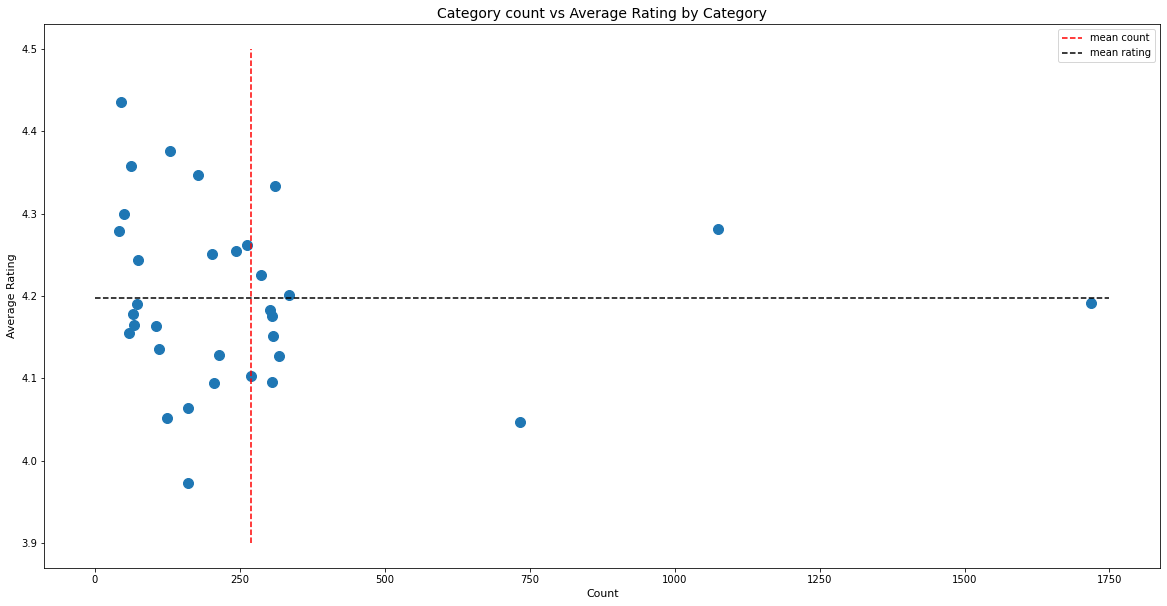

In [1037]:
# Plotting a scatter
plt.figure(figsize=(20,10))# figsize to control size of figure
plt.scatter(df5['Count'], df5['Rating'], s=100)
plt.vlines(df5['Count'].mean(), 3.9, 4.5, color="red", linestyles="--", label='mean count')
plt.hlines(df5['Rating'].mean(), 0, 1750, color="black", linestyles="--", label='mean rating')
plt.xlabel('Count',size=11)
plt.ylabel('Average Rating', size=11)
plt.title('Category count vs Average Rating by Category', size=14)
plt.legend()
plt.show();

Although there is a slight downward slope in the left upper quadrante and the highest rated app has a count of less than 269, there are quite a few `Categories` with more than the average 4.20 rating and more than 269 observations. 

Furthermore, the bottom left quadrant has a lower than average rating despite having relatively few observations. Hence, a poistive bias in rating coming from a `Category`have few observations is not obvious. 

Now let's check on the top ratings performers  

In [1038]:
## Instead of alphabetical order by category, I will sort by average value
df5.sort_values('Rating', axis=0, ascending=False, inplace=True)

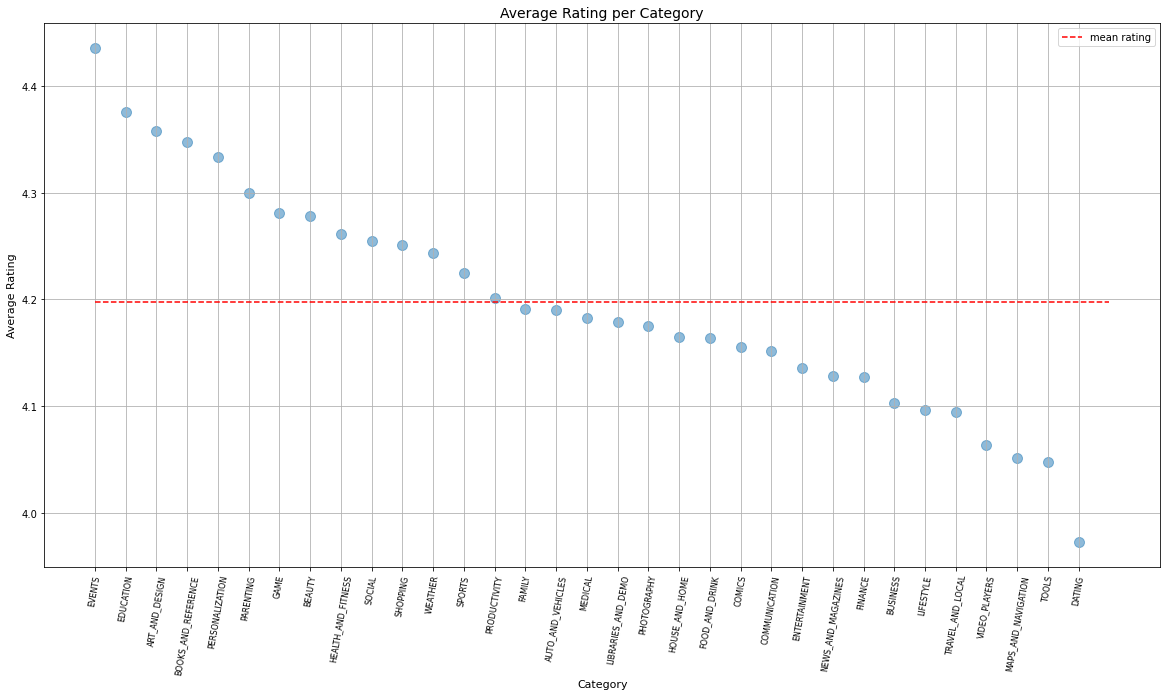

In [1039]:
# Plotting a scatter
plt.figure(figsize=(20,10))# figsize to control size of figure
plt.scatter(df5['Category'], df5['Rating'], s=100, alpha=0.5)
plt.xlabel('Category',size=11)
plt.ylabel('Average Rating', size=11)
plt.hlines(df5['Rating'].mean(), 0, 33, color="red", linestyles="--", label='mean rating')
plt.legend()
plt.title('Average Rating per Category', size=14)
plt.xticks(df3['Category'], rotation=80, size=8)
plt.grid()      
plt.show();

There is a group of five distinct top performers.
- EVENTS is by itself, clearly above the diagonal downward slope. 
- EDUCATION, ART_AND_DESIGN, BOOKS_AND_REFERENCE and PERSONALIZATOIN are next. 

The four are aligned in the same slope. The next one, PARENTING, is aligned with the slope of the next tier.  

*Hence, PERSONALIZATION is the last of the "top performers".* 

Conversely, the bottom 5 perfomers are: 
- TRAVEL_AND_LOCAL, 
- VIDEO PLAYERS
- MAPS_AND_NAVIGATION 
- TOOLS
- DATING

Let's look deeper into EVENTS. How many reviews do the top apps have?

In [1040]:
df1 [(df1['Category']=='EVENTS') & (df1['Rating']==5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price,Popularity,Cat_Reviews,Cat_Content
7658,EF Events,EVENTS,5.0,7.0,4.4M,100+,Free,Teen,EVENTS,"October 5, 2017",Varies with device,Varies with device,0.0,Small,Unstable,Teen
7665,EK Bailey Preaching Conference,EVENTS,5.0,3.0,30M,500+,Free,Everyone,EVENTS,"July 2, 2018",5.30.01,5.1 and up,0.0,Small,Unstable,Everyone
7672,Mindvalley U Tallinn 2018,EVENTS,5.0,1.0,21M,100+,Free,Everyone,EVENTS,"July 3, 2018",1.0.5,4.4 and up,0.0,Small,Unstable,Everyone
7673,SUMMER SONIC app,EVENTS,5.0,4.0,61M,500+,Free,Everyone,EVENTS,"July 24, 2018",1,4.4 and up,0.0,Small,Unstable,Everyone
7687,FAST EO,EVENTS,5.0,1.0,Varies with device,10+,Free,Everyone,EVENTS,"May 15, 2018",1.0.3,4.1 and up,0.0,Small,Unstable,Everyone
7702,Prosperity,EVENTS,5.0,16.0,2.3M,100+,Free,Everyone,EVENTS,"July 9, 2018",1.14,2.0 and up,0.0,Small,Unstable,Everyone


There are the five app with the maximum rating for EVENTS, yet the number of reviews is small. Hence, the `Cat_Reviews` variable is categorized as Unstable. What would happen if we performed the original analysis only for Medium and Stable in Cat_Reviews? 

#### Controlling for number of reviews

In [1041]:
#Creating a df with only these two Cat_Reviews
df6=df1[(df1['Cat_Reviews']=='Medium') | (df1['Cat_Reviews']=='Stable')]

In [1042]:
df6.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price,Popularity,Cat_Reviews,Cat_Content
0,Weather Live,WEATHER,4.5,76593.0,Varies with device,"500,000+",Paid,Everyone,WEATHER,"November 21, 2017",Varies with device,Varies with device,5.99,Medium,Stable,Everyone
1,Weather by WeatherBug: Forecast,WEATHER,4.5,981995.0,Varies with device,"10,000,000+",Free,Everyone,WEATHER,"June 7, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
2,SMHI Weather,WEATHER,3.5,11297.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 26, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
3,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,"1,000,000+",Free,Everyone,WEATHER,"June 12, 2018",Varies with device,Varies with device,0.00,Large,Stable,Everyone
4,Weather From DMI/YR,WEATHER,4.3,2143.0,Varies with device,"100,000+",Free,Everyone,WEATHER,"July 31, 2018",Varies with device,Varies with device,0.00,Medium,Medium,Everyone


In [1043]:
df6.shape

(6684, 16)

In [1044]:
## Preparing for visualization by grouping per category
stable_group=df6.groupby('Category').mean()['Rating']

In [1045]:
stable_group

Category
ART_AND_DESIGN         4.351111
AUTO_AND_VEHICLES      4.326000
BEAUTY                 4.325926
BOOKS_AND_REFERENCE    4.412931
BUSINESS               4.186525
COMICS                 4.173913
COMMUNICATION          4.193033
DATING                 3.970000
EDUCATION              4.373016
ENTERTAINMENT          4.136036
EVENTS                 4.334783
FAMILY                 4.182184
FINANCE                4.196380
FOOD_AND_DRINK         4.220213
GAME                   4.292959
HEALTH_AND_FITNESS     4.353774
HOUSE_AND_HOME         4.155738
LIBRARIES_AND_DEMO     4.150000
LIFESTYLE              4.027895
MAPS_AND_NAVIGATION    4.147191
MEDICAL                4.272993
NEWS_AND_MAGAZINES     4.118065
PARENTING              4.362857
PERSONALIZATION        4.334742
PHOTOGRAPHY            4.228736
PRODUCTIVITY           4.265625
SHOPPING               4.261494
SOCIAL                 4.282653
SPORTS                 4.258607
TOOLS                  4.131299
TRAVEL_AND_LOCAL       4.147403

In [1046]:
## Creating a new df for visualization 
df7=pd.DataFrame(data=stable_group).reset_index()

In [1047]:
## Instead of alphabetical order by category, I will sort by average value
df7.sort_values('Rating', axis=0, ascending=False, inplace=True)

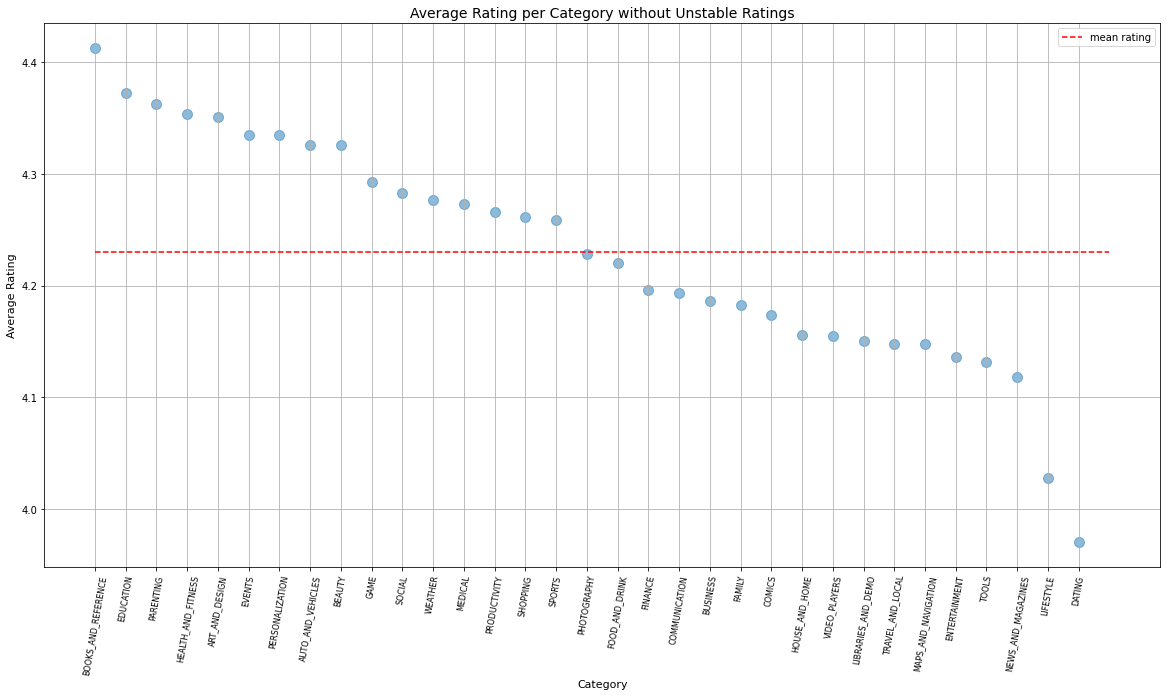

In [1048]:
# Plotting a scatterplot
plt.figure(figsize=(20,10))# figsize to control size of figure
plt.scatter(df7['Category'], df7['Rating'], s=100, alpha=0.5)
plt.xlabel('Category',size=11)
plt.ylabel('Average Rating', size=11)
plt.hlines(df7['Rating'].mean(), 0, 33, color="red", linestyles="--", label='mean rating')
plt.legend()
plt.title('Average Rating per Category without Unstable Ratings', size=14)
plt.xticks(df7['Category'], rotation=80, size=8)
plt.grid()      
plt.show();

When I control for number of reviews, the top 5 rated categories are: 

- BOOKS_AND_REFERENCE
- EDUCATION
- PARENTING
- HEALTH AND FITNESS
- ART AND DESIGN 

Hence, when controlling for number of reviews, BOOKS_AND_REFERENCE, EDUCATION and ART_AND_DESIGN are in both groups. For the purpose of the top/bottom perfomance analysis, I will keep this latest stable reviews grouping. 

#### Top and bottom performing categories

I create a dataframe of just the top performers will aid to visualize the distributions of ratings for each category. Conversely, I also create a dataframe for bottom performers to compare the results with the first group. 

In [1049]:
topperf=df6 [(df6['Category']=='BOOKS_AND_REFERENCE') | (df6['Category']=='EDUCATION') | (df6['Category']=='PARENTING') | (df6['Category']=='HEALTH_AND_FITNESS') | (df6['Category']=='ART_AND_DESIGN') ]

In [1050]:
topperf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 2854 to 8894
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             534 non-null    object 
 1   Category        534 non-null    object 
 2   Rating          534 non-null    float64
 3   Reviews         534 non-null    float64
 4   Size            534 non-null    object 
 5   Installs        534 non-null    object 
 6   Type            534 non-null    object 
 7   Content Rating  534 non-null    object 
 8   Genres          534 non-null    object 
 9   Last Updated    499 non-null    object 
 10  Current Ver     498 non-null    object 
 11  Android Ver     496 non-null    object 
 12  Price           534 non-null    float64
 13  Popularity      534 non-null    object 
 14  Cat_Reviews     534 non-null    object 
 15  Cat_Content     534 non-null    object 
dtypes: float64(3), object(13)
memory usage: 70.9+ KB


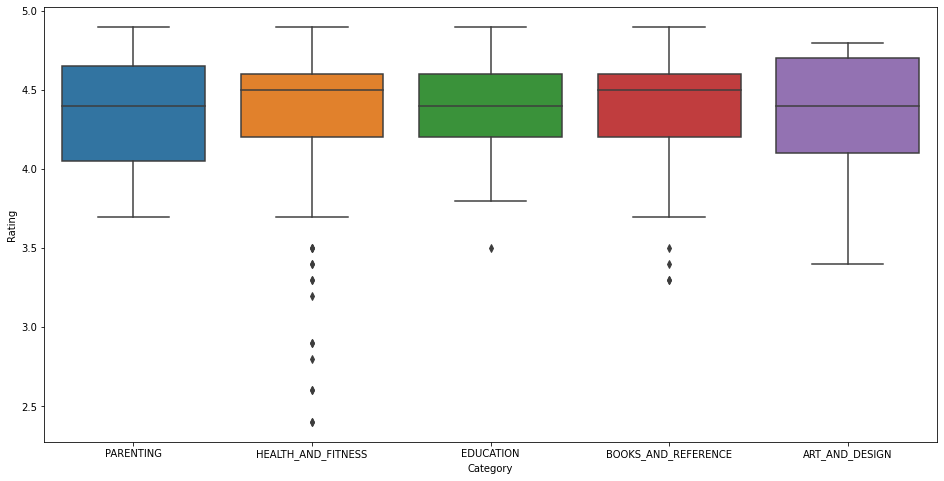

In [1051]:
# Boxplot by Category for top performers
plt.figure(figsize=(16,8))
sns.boxplot(data=topperf, x='Category', y='Rating')
plt.show();

EDUCATION is the most consistent performer, with only one outlier outside the distribution at the bottom at around 3.5, the smallest IQR and the smallest range. Yet its highest ratings are a bit lower than three of the four categories in the group. 
ART_AND_DESIGN, PARENTING and BOOKS_AND_REFERENCE have similar characteristics, though the first has no outliers at the bottom. HEALTH_AND_FITNESS has the highest median, yet quite a few bad and really bad apps at the bottom of the distribution. 

Now, let's compare this group with the bottom performers.

In [1052]:
bottomperf=df6 [(df6['Category']=='ENTERTAINMENT') | (df6['Category']=='TOOLS') | (df6['Category']=='NEWS_AND_MAGAZINES') | (df6['Category']=='LIFESTYLE') | (df6['Category']=='DATING') ]

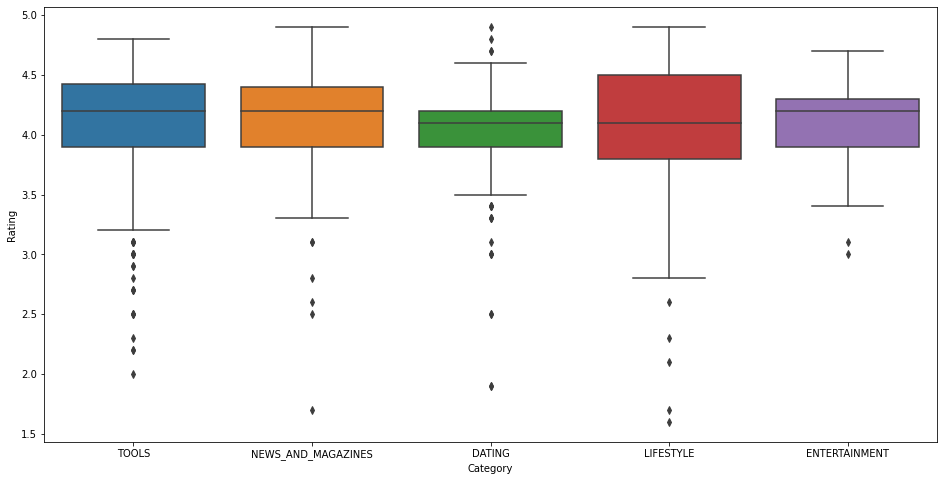

In [1053]:
# Boxplot by Category for bottom performers
plt.figure(figsize=(16,8))
sns.boxplot(data=bottomperf, x='Category', y='Rating')
plt.show();

In this case, there are quite a few outliers at the bottom for all categories, especially for TOOLS and LIFESTYLE. In the case of DATING, one app gets a really bad rating, yet the median value is the lowest and so is the top of the range, although there are 3 outliers at the top. The sense is that, on average, the category has an OK rating, but few really great apps.  

### Is there a difference in ratings between paid and free apps?

A violin plot can help visualize the difference and the describe method will outline the shape of both distributions. 

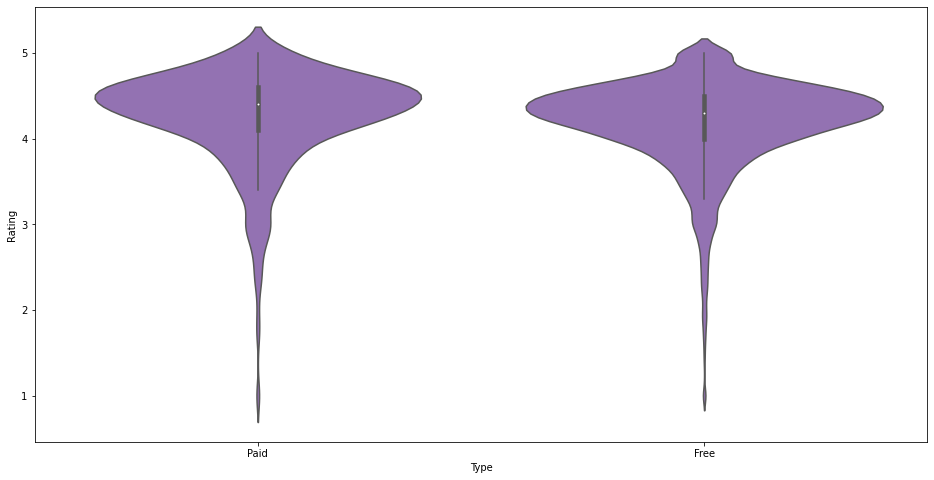

In [1054]:
## Violin plot for Type of app
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[4]

ax=sns.violinplot(data=df1, x='Type', y='Rating', color=base_color, innner=None)

In [1055]:
df1[df1['Type']=='Paid'].describe()

,Rating,Reviews,Price
count,614.000000,6.130000e+02,614.000000
mean,4.261075,1.485037e+04,13.954984
std,0.556586,1.380872e+05,60.165323
min,1.000000,1.000000e+00,0.990000
25%,4.100000,3.100000e+01,1.990000
50%,4.400000,2.140000e+02,2.990000
75%,4.600000,2.359000e+03,4.990000
max,5.000000,2.376564e+06,400.000000


In [1056]:
df1[df1['Type']=='Free'].describe()

,Rating,Reviews,Price
count,8281.00000,8.281000e+03,8281.0
mean,4.18214,5.065604e+05,0.0
std,0.51989,3.007334e+06,0.0
min,1.00000,1.000000e+00,0.0
25%,4.00000,2.030000e+02,0.0
50%,4.30000,6.449000e+03,0.0
75%,4.50000,8.538700e+04,0.0
max,5.00000,7.815831e+07,0.0


Yes, there seems to be a slight difference, especially at the top. Paid apps have higher ratings, which makes the mean of the distribution higher than that of the free apps. It is worth noting that there are much fewer observations in the paid case. An additional step in the analysis for the future would be to check if this sample is skewed, or if indeed, just 7% of apps are paid for.  

### Do other features such as number of `Reviews` and `Content Rating` have any influece on app rating?

The first question has been addressed in 4.1.1. Yes. When controlling for number of reviews, the average rating per Category changes. The reason for controlling for reviews is the introduction of biases in really well or poorly rated apps. As more reviews come in, less people will be likely to give it a 5 or a 1 rating unless the apps deserve them. We can look at a boxplot of the ratings per `Category` in the original df1 to see if there are difference when not looking at the `Category` level.  

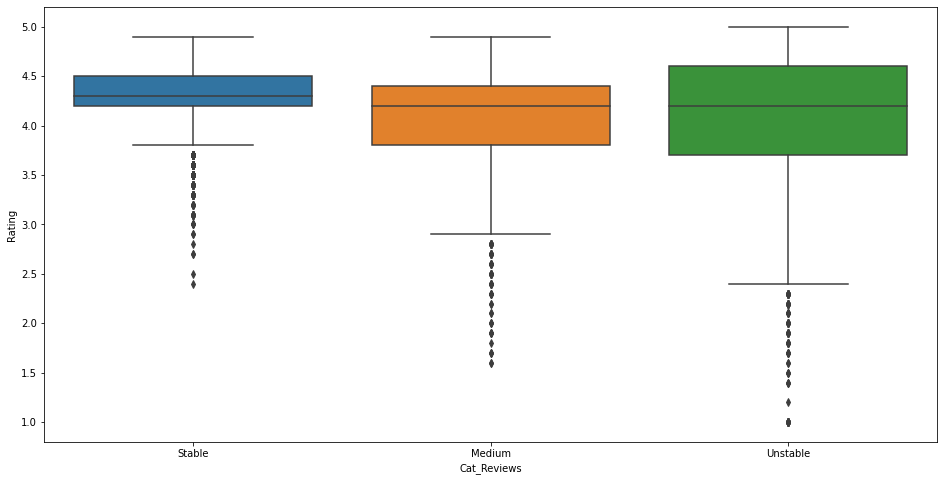

In [1057]:
# Boxplot by Category for bottom performers
plt.figure(figsize=(16,8))
sns.boxplot(data=df1, x='Cat_Reviews', y='Rating')
plt.show();

Unstable reviews have a much larger range and much longer tail at the bottom. There are quite few really bad reviews. Also, the top range is higher than in the other groups. This is expected, since this group has less than 162 reviews and in some cases less than 10. 

For content rating, the following boxplot shows the distribution of ratings with the new `Cat_Content` feature. 

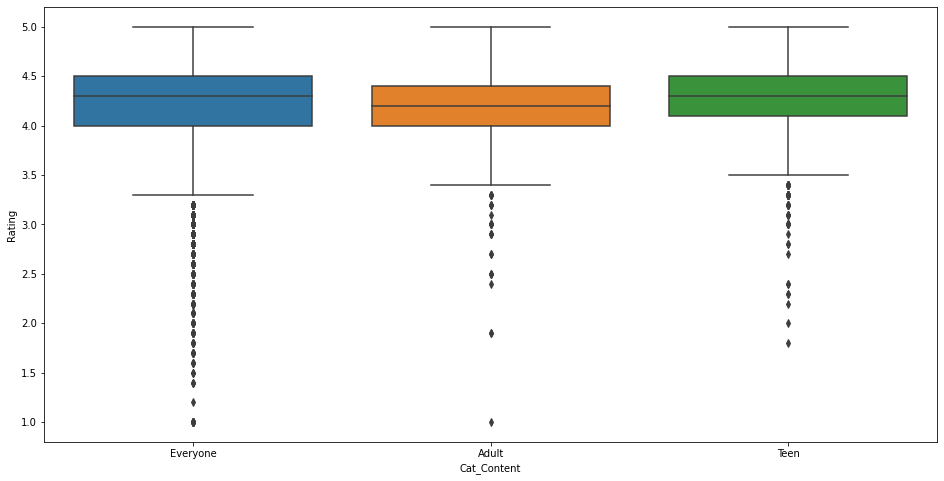

In [1061]:
# Boxplot by Category for bottom performers
plt.figure(figsize=(16,8))
sns.boxplot(data=df1, x='Cat_Content', y='Rating')
plt.show();

The three categories have similar distributions. 'Everyone' has a longer left tail because it contains more then 90% of the observations and is more likely to contain the outliers of all categories. 

## Conclusions

- On average, users tend to give positive ratings. The distribution of ratings shows a left skew, with only 25% of the distribution below 4. The average rating is 4.20 and the median 4.30. Hence, any detailed analysis of differences among categories or among particular apps within a category will happen in the 4 to 5 range. 
- The top-rated categories in the Google Play Store are Education, Books and Reference, and Art and Design. These are among  the top five categories even when we control for number of ratings (more than 162). 
- Education has the most consistent ratings . The range is smaller than other categories and has only one outlier at the bottom with a rating of 3.5. Nevertheless, it does not have any 5 ratings. 
- Dating is the worst performing category in terms of ratings. Although its range is compact, top performers are few and it has a long left tail with a few very poorly-rated apps. 
- Paid apps are better rated than free apps. Free apps show a longer left tail. This could be because developers spend less time and effort on the product since its free. The opposite argument could be made for paid apps. 
- It's important to caveat that only 7% of the apps in this sample are paid. A quick Google search shows that paid apps are 3% of total apps for 2022. So the averages and medians discussed above are probably more favorable than what they are currently, since this dataset's most current information is for August of 2018. 
- Apps with less than 162 reviews have a much wider distribution for ratings than those with more than 4700 reviews. As expected, the law of large numbers draws the variance down. This was to reason to exclude the former group from the Category analysis. 
- Median values for ratings tend to be consistent across Content categories (Everyone, Teen, Adult). Apps for Everyone do have a longer left tail, but this is probably due to representing more than 90% of the total observations in the sample. 